## Julia. Lecture 3

In [ ]:
# using Pkg
# Pkg.add("Plots")
# Pkg.add("StatsPlots")
# Pkg.add("DataFrames")
# Pkg.add("RDatasets")
# Pkg.add("GR")
# Pkg.add("HypothesisTests")

### Visualisation

In [11]:
using Plots, RDatasets

#### Plots

In [12]:
gr()

Plots.GRBackend()

In [29]:
x = 1:100;
y = x.^2;
y2 = x.^2 ./ sqrt.(x);
error_term1 = x.^1.9 - x.^2.1;
error_term2 = 10*x;

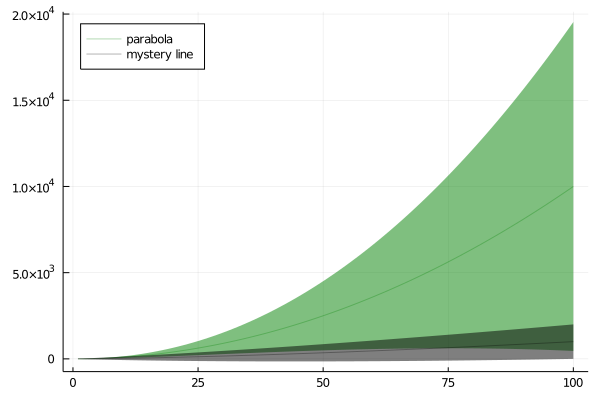

In [30]:
p1 = plot(x,y, label = "parabola", legend = :topleft, colour= :green, ribbon = error_term1, alpha = 0.3)
p2 = plot!(x,y2, label = "mystery line", legend = :topleft, colour= :black, ribbon = error_term2, alpha = 0.3)

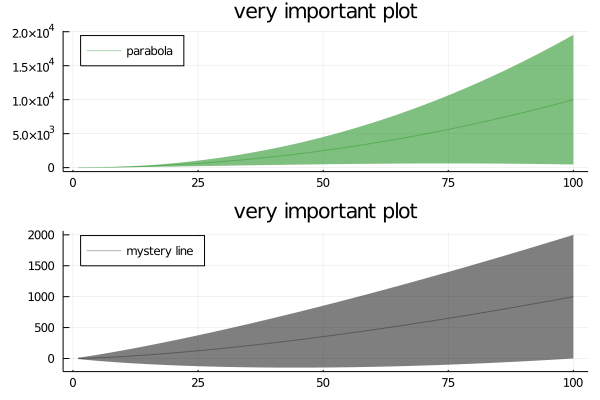

In [37]:
p1 = plot(x,y, label = "parabola", legend = :topleft, colour= :green, ribbon = error_term1, alpha = 0.3);
p2 = plot(x,y2, label = "mystery line", legend = :topleft, colour= :black, ribbon = error_term2, alpha = 0.3);
plot(p1, p2, layout = (2,1), title = "very important plot")

#### StatsPlots

In [38]:
using StatsPlots

In [40]:
iris = dataset("datasets", "iris");
head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


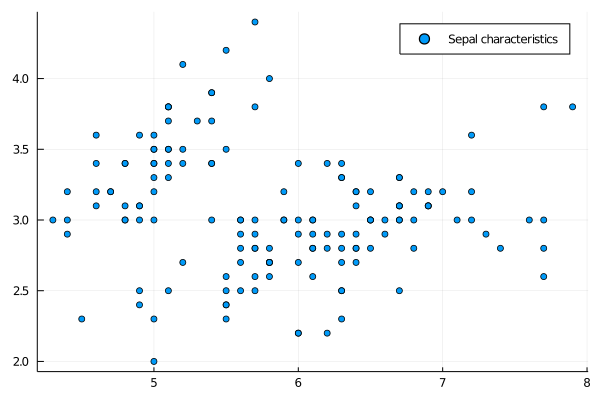

In [42]:
@df iris scatter(:SepalLength, :SepalWidth, label = "Sepal characteristics")

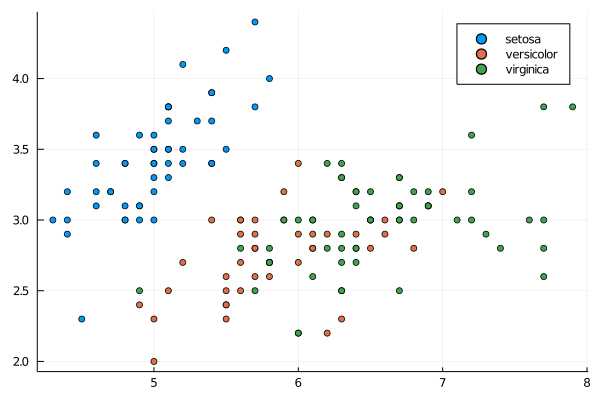

In [43]:
@df iris scatter(:SepalLength, :SepalWidth, group = :Species)

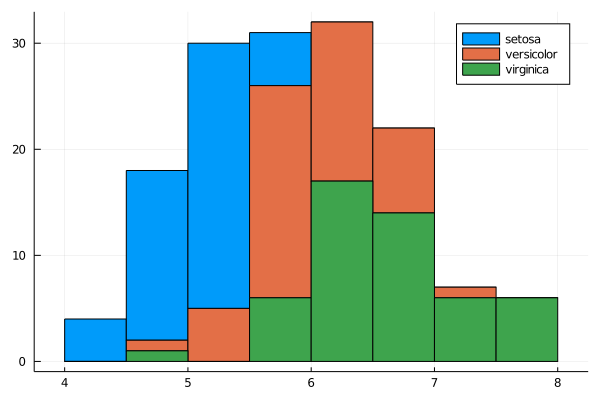

In [46]:
@df iris groupedhist(:SepalLength, group = :Species, bar_position = :stack)

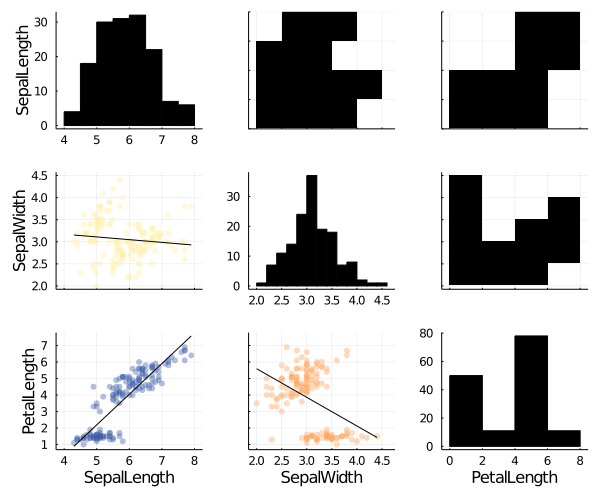

In [61]:
@df iris corrplot([:SepalLength :SepalWidth :PetalLength])

### Hypothesis Tests

In [62]:
using HypothesisTests
using Statistics

In [68]:
pvalue(OneSampleTTest(iris[:SepalWidth],3.05))

0.8370252988119653

In [69]:
hist_data = dataset("HistData", "Prostitutes");

In [70]:
head(hist_data)

,Year,Month,Count,Mon,Date
,Int32,Cat…,Int32,Int32,Date…
1,1812,Jan,1110,1,1812-01-01
2,1812,Feb,1124,2,1812-02-01
3,1812,Mar,1180,3,1812-03-01
4,1812,Apr,1235,4,1812-04-01
5,1812,May,1267,5,1812-05-01
6,1812,Jun,1296,6,1812-06-01


In [72]:
ADFTest(hist_data[:Count], :none, 10)

Augmented Dickey-Fuller unit root test
--------------------------------------
Population details:
    parameter of interest:   coefficient on lagged non-differenced variable
    value under h_0:         0
    point estimate:          0.00200254

Test summary:
    outcome with 95% confidence: fail to reject h_0
    p-value:                     0.9027

Details:
    sample size in regression:          505
    number of lags:                     10
    ADF statistic:                      0.908888
    Critical values at 1%, 5%, and 10%: [-2.57009 -1.94153 -1.61632]


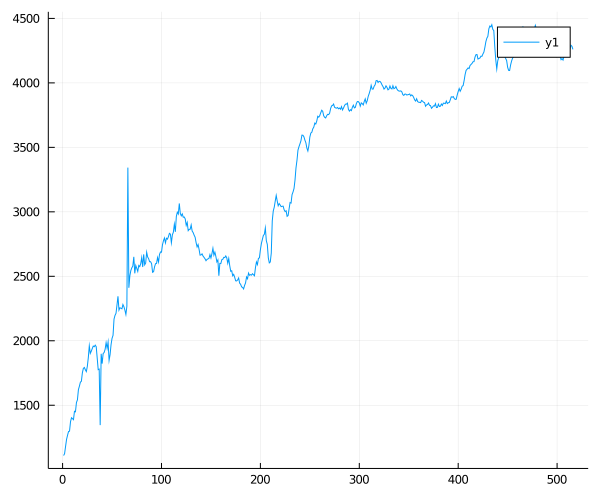

In [73]:
plot(hist_data[:Count])